# Chapter 4: Classification

In [2]:
#Standard imports for this chapter

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import sklearn.linear_model as skl_lm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, precision_score
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors

import statsmodels.api as sm
import statsmodels.formula.api as smf



In [3]:
#Load datasets
data=pd.read_csv('../Data/Auto.csv', na_values='?').dropna()
data=data.loc[:,data.columns != 'name'] # remove name column
data.head(1000)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1
393,44.0,4,97.0,52.0,2130,24.6,82,2
394,32.0,4,135.0,84.0,2295,11.6,82,1
395,28.0,4,120.0,79.0,2625,18.6,82,1


### 11. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

**(a)** Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() function. Note you may find it helpful to use the data.frame() function to create a single data set containing both mpg01 and the other Auto variables.



In [4]:
data['mpg01'] = np.transpose([data.mpg > data.mpg.median()]).astype(int)
data.head(1000)

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
0,18.0,8,307.0,130.0,3504,12.0,70,1,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,1
393,44.0,4,97.0,52.0,2130,24.6,82,2,1
394,32.0,4,135.0,84.0,2295,11.6,82,1,1
395,28.0,4,120.0,79.0,2625,18.6,82,1,1


**(b)** Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this question. Describe your findings.

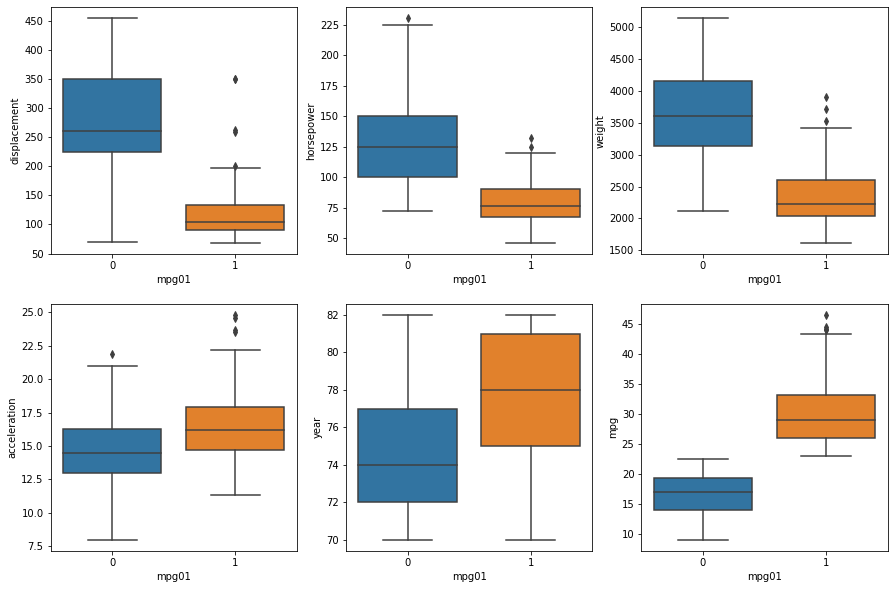

In [5]:
f, axes = plt.subplots(2, 3, figsize=(15,10))
sns.boxplot(x='mpg01', y='displacement', data=data, orient='v', ax=axes[0][0])
sns.boxplot(x='mpg01', y='horsepower', data=data, orient='v', ax=axes[0][1])
sns.boxplot(x='mpg01', y='weight', data=data, orient='v', ax=axes[0][2])
sns.boxplot(x='mpg01', y='acceleration', data=data, orient='v', ax=axes[1][0])
sns.boxplot(x='mpg01', y='year', data=data, orient='v', ax=axes[1][1])
sns.boxplot(x='mpg01', y='mpg', data=data, orient='v', ax=axes[1][2])

From the boxplots we see that mpg is a very good predictor, having no class overlap for the different classes of mpg01. This is expected since mpg01 is constructed depending on the median of mpg.   
Apart from this variable it sems as displacement, horsepower and weight could be the best predictors since they have as little overlap as possible for most samples.

To check out the categorical variables we use a bar plot:

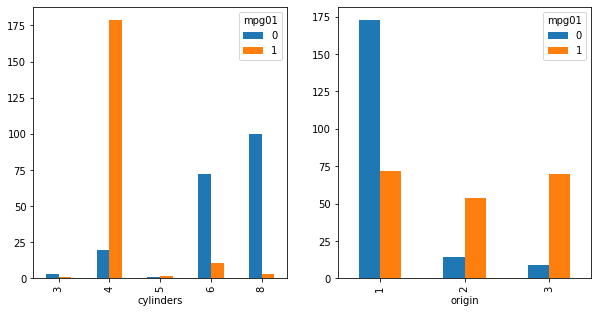

In [6]:
f, axes = plt.subplots(1, 2, figsize=(10,5))

#table=pd.crosstab(data.cylinders,data.mpg01)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[0])
#table=pd.crosstab(data.origin,data.mpg01)
#table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, ax=axes[1])

pd.crosstab(data.cylinders,data.mpg01).plot(kind='bar',ax=axes[0])
pd.crosstab(data.origin,data.mpg01).plot(kind='bar',ax=axes[1])


I am a little bit unsure about how to interpret this, but the way I reason can be shown through an example: If an observation we wish to classify has 4 cylinders we can be quite sure that mpg01 for that observation is 1. Likewise, if another observation has 6 or 8 cylinders we can assume that mpg01 is 0. Therefore cylinder could be quite a good predictor. Using the same reasoning origin could also be a useful predictor. However, there are quite a few observations in the origin variable that does not follow this pattern. Most observations are from origin 1, and in that case using origin would not be a useful predictor. 

Now lets check the correlation matrix to find colinearity.

In [395]:
data.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,mpg01
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209,0.836939
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932,-0.759194
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535,-0.753477
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171,-0.667053
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005,-0.757757
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746,0.346822
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528,0.429904
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000,0.513698
mpg01,0.836939,-0.759194,-0.753477,-0.667053,-0.757757,0.346822,0.429904,0.513698,1.000000


We want to avoid colinearity in our dataset, and it seems mpg, cylinders, displacement, horsepower and weight are all higly correlated. Therefore we remove all of these except mpg as that predictor seems to be the most useful one.

In [396]:
data.drop(['cylinders','displacement','horsepower','weight'], inplace=True, axis=1)
data

,mpg,acceleration,year,origin,mpg01
0,18.0,12.0,70,1,0
1,15.0,11.5,70,1,0
2,18.0,11.0,70,1,0
3,16.0,12.0,70,1,0
4,17.0,10.5,70,1,0
...,...,...,...,...,...
392,27.0,15.6,82,1,1
393,44.0,24.6,82,2,1
394,32.0,11.6,82,1,1
395,28.0,18.6,82,1,1


Maybe origin is not a good predictor as previously stated, but I choose to include it to practice categorical variables. Therefore we also need to create dummy variables for origin.

In [397]:
dData=data
orgd=pd.get_dummies(data['origin'], prefix='origin')
dData=dData.join(orgd)
#Drop one dummy variable since there should be n-1 dummy variables for each category
dData.drop(['origin_1'], inplace=True, axis=1)
#Also drop the original variable since we now have dummy variables to describe it
dData.drop(['origin'], inplace=True, axis=1)
#Rearrange the mpg01 variable to the end
mpg01 = dData.mpg01
dData.drop(['mpg01'], inplace=True, axis=1)
dData=dData.join(mpg01)
dData

,mpg,acceleration,year,origin_2,origin_3,mpg01
0,18.0,12.0,70,0,0,0
1,15.0,11.5,70,0,0,0
2,18.0,11.0,70,0,0,0
3,16.0,12.0,70,0,0,0
4,17.0,10.5,70,0,0,0
...,...,...,...,...,...,...
392,27.0,15.6,82,0,0,1
393,44.0,24.6,82,1,0,1
394,32.0,11.6,82,0,0,1
395,28.0,18.6,82,0,0,1


**(c)** Split the data into a training set and a test set.
I choose to split the data into 30% for test and 60% for training.

Before doing that we also normalize the data so we can use it with KNN later on.

In [428]:
x = dData.values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
dData = pd.DataFrame(x_scaled, columns=dData.columns)
dData

,mpg,acceleration,year,origin_2,origin_3,mpg01
0,0.239362,0.238095,0.0,0.0,0.0,0.0
1,0.159574,0.208333,0.0,0.0,0.0,0.0
2,0.239362,0.178571,0.0,0.0,0.0,0.0
3,0.186170,0.238095,0.0,0.0,0.0,0.0
4,0.212766,0.148810,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
387,0.478723,0.452381,1.0,0.0,0.0,1.0
388,0.930851,0.988095,1.0,1.0,0.0,1.0
389,0.611702,0.214286,1.0,0.0,0.0,1.0
390,0.505319,0.630952,1.0,0.0,0.0,1.0


In [435]:
#Split and shuffes the data into a train and test set (test set becomes 30% of dataset)
X_train, X_test, y_train, y_test = model_selection.train_test_split(dData.loc[:, dData.columns != 'mpg01'], dData.mpg01, test_size=0.3)

**(d)** Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [436]:
lda = LinearDiscriminantAnalysis(solver='svd')
lda.fit(X_train, y_train)
y_pred = lda.predict(X_test)
confMat=confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(confMat)
TN=confMat[0,0]
FN=confMat[1,0]
TP=confMat[1,1]
FP=confMat[0,1]
errorRate=(FN+FP)*1.0/(TN+FN+TP+FP)
print("Error rate: ")
print(errorRate)

Confusion matrix: 
[[63  0]
 [ 3 52]]
Error rate: 
0.025423728813559324


**(e)** Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [437]:
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred=qda.predict(X_test)
confMat=confusion_matrix(y_test, y_pred)
print("Confusion matrix: ")
print(confMat)
TN=confMat[0,0]
FN=confMat[1,0]
TP=confMat[1,1]
FP=confMat[0,1]
errorRate=(FN+FP)*1.0/(TN+FN+TP+FP)
print("Error rate: ")
print(errorRate)



Confusion matrix: 
[[52 11]
 [ 4 51]]
Error rate: 
0.1271186440677966


In [438]:
# Another way of obtaining the error rates
print("LDA error rate: " +str(1-lda.score(X_test,y_test)))
print("QDA error rate: " +str(1-qda.score(X_test,y_test)))

LDA error rate: 0.025423728813559365
QDA error rate: 0.1271186440677966


It seems as the LDA performs very much better than QDA on the test set using the training data.

**(f)** Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [440]:
logreg = LogisticRegression(solver='newton-cg')
logreg.fit(X_train, y_train)
print("Logreg error rate: "+str(1-logreg.score(X_test,y_test)))

Logreg error rate: 0.11864406779661019


In this case logreg performs better than QDA but worse than LDA.

**(g)** Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [443]:
knn = neighbors.KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
print("KNN=1 error rate: "+str(1-knn.score(X_test,y_test)))

knn = neighbors.KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
print("KNN=3 error rate: "+str(1-knn.score(X_test,y_test)))

knn = neighbors.KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
print("KNN=5 error rate: "+str(1-knn.score(X_test,y_test)))

knn = neighbors.KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)
print("KNN=7 error rate: "+str(1-knn.score(X_test,y_test)))

knn = neighbors.KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
print("KNN=9 error rate: "+str(1-knn.score(X_test,y_test)))

knn = neighbors.KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
print("KNN=11 error rate: "+str(1-knn.score(X_test,y_test)))

KNN=1 error rate: 0.0847457627118644
KNN=3 error rate: 0.11016949152542377
KNN=5 error rate: 0.09322033898305082
KNN=7 error rate: 0.11016949152542377
KNN=9 error rate: 0.1271186440677966
KNN=11 error rate: 0.1271186440677966


It seems as the non-parametric KNN method works better with lower number of neighbors in this case.

After comparing all the different classifiers, we can conclude that LDA by far works best using the chosen predictors.